In [177]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [178]:
'''
유튜브 랭킹 사이트(https://youtube-rank.com/board/bbs/board.php?bo_table=youtube)에서
카테고리, 제목, 구독자 등 최대 200개 이상 크롤링(selenium)하여
카테고리별 분석하여 그래프(파이 등)으로 시각화하기
'''

'\n유튜브 랭킹 사이트(https://youtube-rank.com/board/bbs/board.php?bo_table=youtube)에서\n카테고리, 제목, 구독자 등 최대 200개 이상 크롤링(selenium)하여\n카테고리별 분석하여 그래프(파이 등)으로 시각화하기\n'

In [179]:
# -------------------------------------------
# 유튜브 채널 랭킹
# -------------------------------------------


# 유튜브 채널 랭킹 사이트 기본 URL (페이지 번호만 바뀜)
youtube_url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page='

# 데이터를 저장할 리스트
category_list = []     # 채널 카테고리 저장
title_list = []        # 채널 제목 저장
subscribes_list = []   # 구독자 수 저장



# --- 특정 페이지를 크롤링하는 함수 ---
def get_source(page):

    # Chrome 웹드라이버 자동 설치 후 실행
    # (ChromeDriverManager가 현재 OS에 맞는 크롬드라이버를 자동 설치함)
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

    # 유튜브 랭킹 페이지 접속 (page 매개변수에 따라 1페이지, 2페이지 ...)
    driver.get(youtube_url + str(page))

    # 페이지 로딩 후, 페이지 맨 아래까지 스크롤하여 동적 콘텐츠 로딩 유도
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # 각 항목을 포함하는 요소들 추출
    # '.aos-init.aos-animate'는 각 채널 정보가 들어 있는 영역
    category = driver.find_elements(By.CSS_SELECTOR, '.aos-init.aos-animate .subject')
    title = driver.find_elements(By.CSS_SELECTOR, '.aos-init.aos-animate .subject')
    subscribes = driver.find_elements(By.CSS_SELECTOR, '.aos-init.aos-animate')


    # --- 카테고리 가져오기 ---
    # 각 채널 항목(tag) 내부에서 '.category' 요소를 찾음
    for tag in category:
        try:
            # category 요소는 채널 종류(예: 음악/게임/교육 등)를 나타냄
            category_elements = tag.find_elements(By.CSS_SELECTOR, '#list-skin .category')

            # 요소가 존재하면 텍스트 추출
            if category_elements:
                temp = category_elements[0].text.strip()
            else:
                temp = "해당 정보 없음"

            category_list.append(temp)
        except:
            print("카테고리 가져오는 중 에러 발생!")


    # --- 채널 제목 가져오기 ---
    # 제목 링크는 'td.subject > h1 > a'에 위치
    for tag in title:
        try:
            title_elements = tag.find_elements(
                By.CSS_SELECTOR,
                '#list-skin > form > table > tbody > tr > td.subject > h1 > a'
            )

            if title_elements:
                temp = title_elements[0].text.strip()
            else:
                temp = "해당 정보 없음"

            title_list.append(temp)
        except:
            print("제목 가져오는 중 에러 발생!")


    # --- 구독자 수 가져오기 ---
    # '.subscriber_cnt' 클래스가 포함된 요소에서 구독자 수 텍스트 추출
    for tag in subscribes:
        try:
            subscribes_elements = tag.find_elements(By.CSS_SELECTOR, '.subscriber_cnt')

            if subscribes_elements:
                temp = subscribes_elements[0].text.strip()
            else:
                temp = "해당 정보 없음"

            subscribes_list.append(temp)
        except:
            print("구독자 가져오는 중 에러 발생!")

    # 현재 페이지 크롤링 완료 메시지 출력
    print("end :", page)

    # 브라우저 종료
    driver.quit()


# --- 1~3페이지까지 반복해서 크롤링 실행 ---
for page in range(1, 4):
    get_source(page)

end : 1
end : 2
end : 3


In [180]:
# 카테고리 리스트에 몇 개 항목이 있는지 확인
len(category_list)

300

In [181]:
# 채널명 리스트에 몇 개 항목이 있는지 확인
len(title_list)

300

In [182]:
# 구독자 수 리스트에 몇 개 항목이 있는지 확인
len(subscribes_list)

300

In [183]:
# 수집한 데이터를 하나의 딕셔너리로 정리
# 키 : DataFrame의 컬럼 이름, 값 : 각 컬럼에 들어갈 리스트
dict_info = {
    '카테고리' : category_list,
    '채널명': title_list,   
    '구독자 수': subscribes_list
}

# 딕셔너리를 pandas DataFrame 형태로 변환
# DataFrame : 엑셀처럼 행과 열로 구성된 표 형태
info_df = pd.DataFrame(dict_info)

# DataFrame 출력
# 표 형태로 데이터를 한눈에 확인 가능
info_df

,카테고리,채널명,구독자 수
0,[BJ/인물/연예인],김프로KIMPRO,1억2600만
1,[음악/댄스/가수],BLACKPINK,9940만
2,[음악/댄스/가수],BANGTANTV,8180만
3,[음악/댄스/가수],HYBE LABELS,7920만
4,[미분류],Justin Bieber,7660만
...,...,...,...
295,[주식/경제/부동산],삼프로TV 3PROTV,283만
296,[미분류],뜬뜬 DdeunDdeun,282만
297,[BJ/인물/연예인],진용진,281만
298,[IT/기술/컴퓨터],ITSub잇섭,279만


In [184]:
# 인덱스를 1번부터 시작하도록 설정
info_df.reset_index(drop=True, inplace=True)  # 기존 인덱스 제거
info_df.index = info_df.index + 1  # 새로운 인덱스는 1부터 시작

# 인덱스를 컬럼으로 추가하고 이름 변경
info_df = info_df.reset_index().rename(columns={"index" : "순위"})

info_df

,순위,카테고리,채널명,구독자 수
0,1,[BJ/인물/연예인],김프로KIMPRO,1억2600만
1,2,[음악/댄스/가수],BLACKPINK,9940만
2,3,[음악/댄스/가수],BANGTANTV,8180만
3,4,[음악/댄스/가수],HYBE LABELS,7920만
4,5,[미분류],Justin Bieber,7660만
...,...,...,...,...
295,296,[주식/경제/부동산],삼프로TV 3PROTV,283만
296,297,[미분류],뜬뜬 DdeunDdeun,282만
297,298,[BJ/인물/연예인],진용진,281만
298,299,[IT/기술/컴퓨터],ITSub잇섭,279만


In [185]:
# 엑셀 파일로 저장
info_df.to_excel('youtube_ranking.xlsx', index=False)

# 엑셀 파일 읽기
info_df_read = pd.read_excel('youtube_ranking.xlsx')

# 출력 확인용
info_df_read.head()

,순위,카테고리,채널명,구독자 수
0,1,[BJ/인물/연예인],김프로KIMPRO,1억2600만
1,2,[음악/댄스/가수],BLACKPINK,9940만
2,3,[음악/댄스/가수],BANGTANTV,8180만
3,4,[음악/댄스/가수],HYBE LABELS,7920만
4,5,[미분류],Justin Bieber,7660만


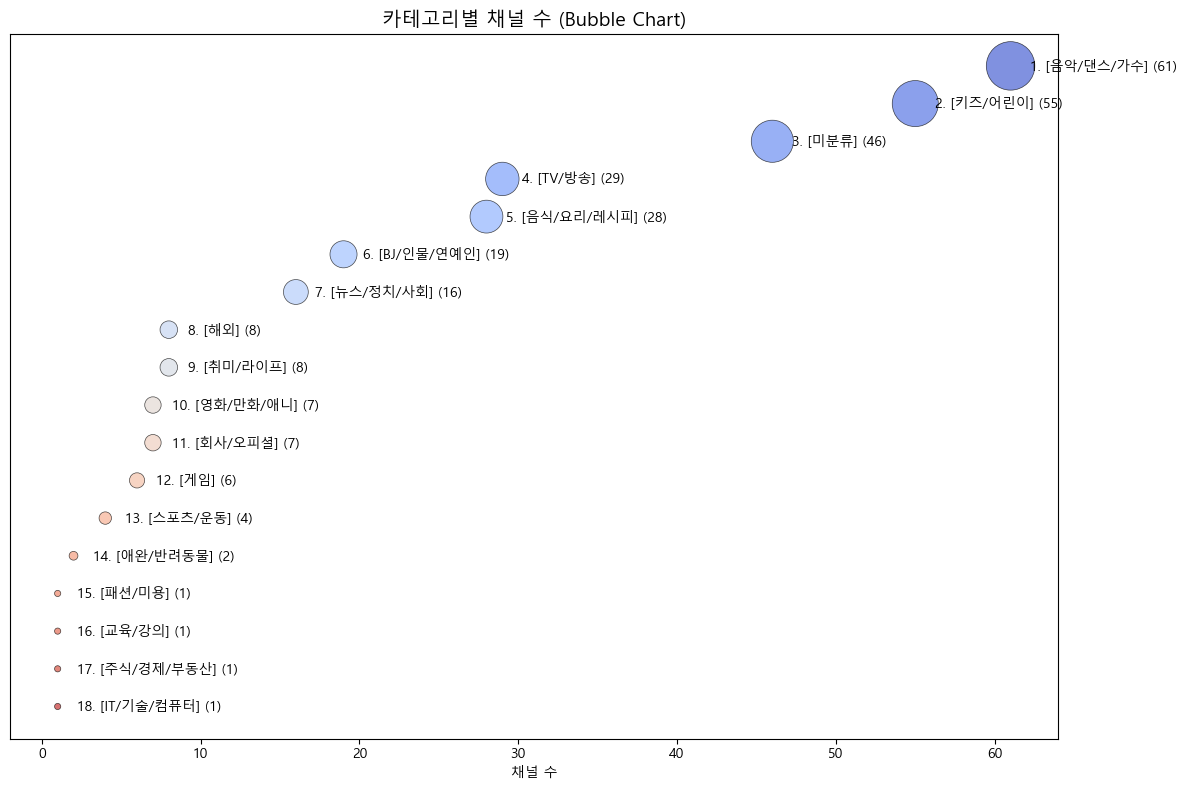

In [188]:
# 카테고리별 채널 수를 많은 순서대로 계산
category_counts = info_df['카테고리'].value_counts().sort_values(ascending=False)

# 그림 크기 설정 (가로 12, 세로 8)
plt.figure(figsize=(12,8))

# y 위치: 카테고리 순서대로 (큰 값이 위로 오도록)
y_positions = np.arange(len(category_counts))

# 점 크기: 채널 수에 비례하도록 설정
sizes = category_counts.values * 20  # 곱하기 20은 시각적 확대용

# 색상: 순위에 따라 그라데이션 적용
colors = sns.color_palette("coolwarm", len(category_counts))

# Bubble Chart 그리기
plt.scatter(
    category_counts.values,  # x축: 채널 수
    y_positions,             # y축: 카테고리 위치
    s=sizes,                 # 점 크기
    alpha=0.7,               # 투명도
    color=colors,            # 점 색상
    edgecolors='black',      # 점 테두리 색
    linewidth=0.5            # 테두리 두께
)

# 점 옆에 라벨 표시 (순위, 카테고리 이름, 채널 수)
for i, (val, name) in enumerate(zip(category_counts.values, category_counts.index)):
    plt.text(
        val + max(category_counts.values)*0.02,  # 점 오른쪽에 약간 떨어뜨려 표시
        y_positions[i],                          # y 위치
        f"{i+1}. {name} ({val})",               # 표시 텍스트
        va='center',                             # 세로 중앙 정렬
        fontsize=10                              # 글자 크기
    )

# y축 뒤집기: 큰 값이 위쪽에 오도록
plt.gca().invert_yaxis()

# y축 라벨 제거 (점 옆에 텍스트가 있으므로 필요 없음)
plt.yticks([])

# x축 라벨
plt.xlabel("채널 수")

# 그래프 제목
plt.title("카테고리별 채널 수 (Bubble Chart)", fontsize=14)

# 레이아웃 자동 조정 (글자나 그림 잘리지 않도록)
plt.tight_layout()

# 그래프 출력
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2500\1103745887.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


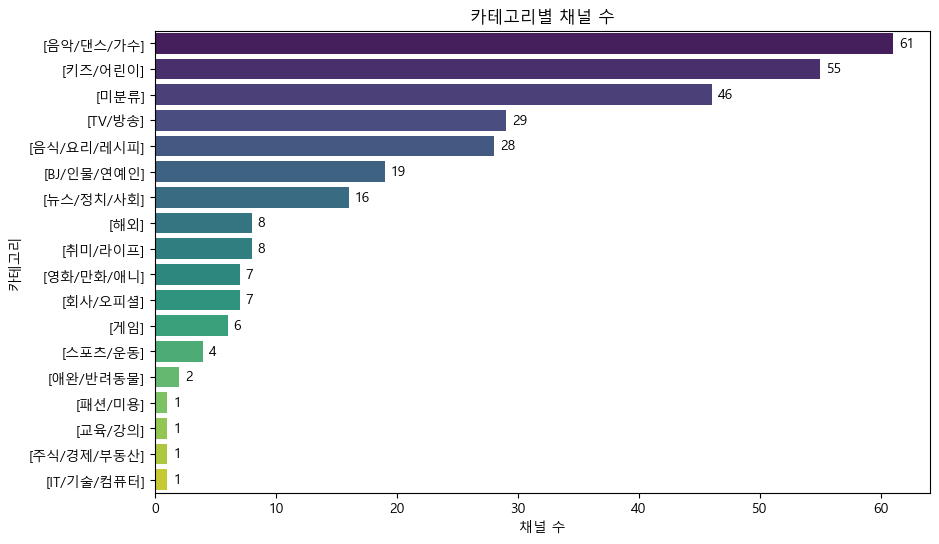

In [190]:
# 카테고리별 채널 수 집계
# info_df['카테고리']에서 각 카테고리가 몇 개 있는지 세기
category_counts = info_df['카테고리'].value_counts()

# 1부터 시작하는 인덱스 붙이기 (범례용)
legend_labels = [f"{i}. {name}" for i, name in enumerate(category_counts.index, start=1)]

# 그림 크기 설정 (가로 10, 세로 6)
plt.figure(figsize=(10, 6))

# 가로 막대 그래프 그리기
# x축: 채널 수, y축: 카테고리 이름
# palette="viridis" : 색상을 viridis 팔레트로 설정
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")

# 막대 끝에 수치 표시
for i, v in enumerate(category_counts.values):
    # v + 0.5 : 막대 끝보다 조금 오른쪽에 표시
    # i : y축 위치
    # va='center' : 세로 중앙 정렬
    plt.text(v + 0.5, i, str(v), va='center')

# 그래프 제목 설정
plt.title('카테고리별 채널 수')

# x축 이름 설정
plt.xlabel('채널 수')

# y축 이름 설정
plt.ylabel('카테고리')

# 그래프 출력
plt.show()

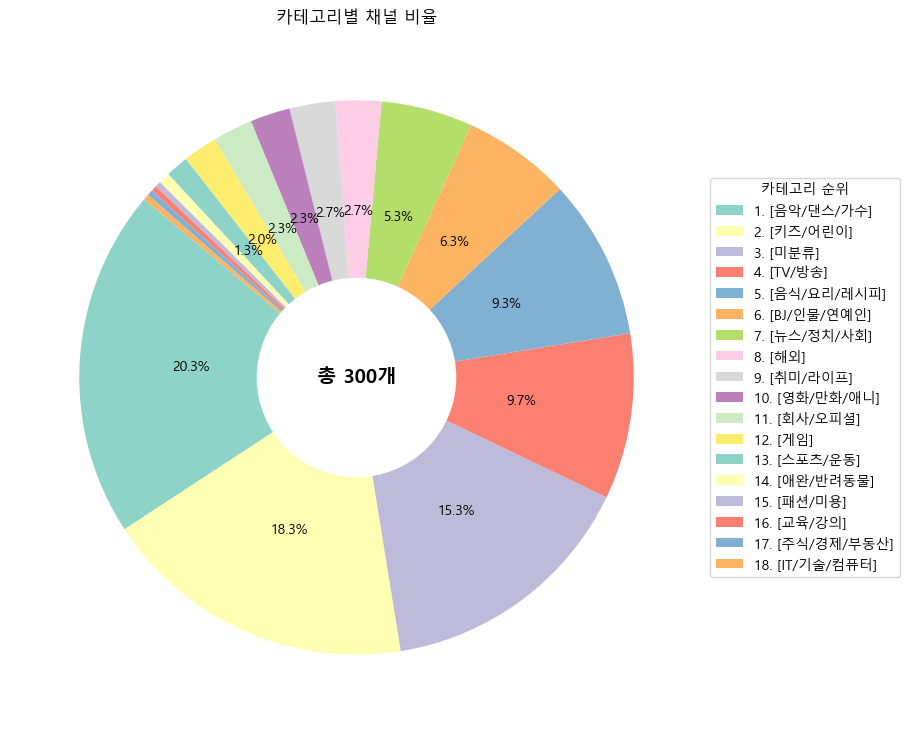

In [191]:
# 그림 크기 설정 (가로 9, 세로 9)
plt.figure(figsize=(9, 9))

# 파이 차트 그리기
plt.pie(
    category_counts.values,       # 각 카테고리별 채널 수
    labels=None,                  # 파이 내부에는 라벨 표시하지 않음
    autopct=lambda pct: f'{pct:.1f}%' if pct >= 1.3 else '',  # 1.3% 이상만 퍼센트 표시
    startangle=140,               # 파이 시작 각도 조정 (회전)
    colors=sns.color_palette("Set3", len(category_counts))  # 색상을 Set3 팔레트로 예쁘게
)

# 도넛 모양 만들기 위해 가운데 흰색 원 추가
centre_circle = plt.Circle((0, 0), 0.36, fc='white')  # 반지름 0.36
plt.gca().add_artist(centre_circle)  # 현재 그림에 추가

# 도넛 중앙에 총 채널 수 텍스트 표시
plt.text(0, 0, f"총 {category_counts.sum()}개", 
         ha='center', va='center', fontsize=14, weight='bold')  # 가운데 정렬, 굵은 글씨

# 범례(legend) 추가
plt.legend(
    [f"{i}. {name}" for i, name in enumerate(category_counts.index, start=1)],  # 1부터 시작하는 번호 + 카테고리 이름
    title="카테고리 순위",               # 범례 제목
    loc="center left",                  # 위치: 왼쪽 중앙 밖
    bbox_to_anchor=(1, 0, 0.5, 1)      # 위치 조정: 그림 밖에 표시
)

# 그래프 제목 설정
plt.title("카테고리별 채널 비율")

# 그래프 출력
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2500\2740960862.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='카테고리', y='구독자 수', data=info_df, palette="Set3")


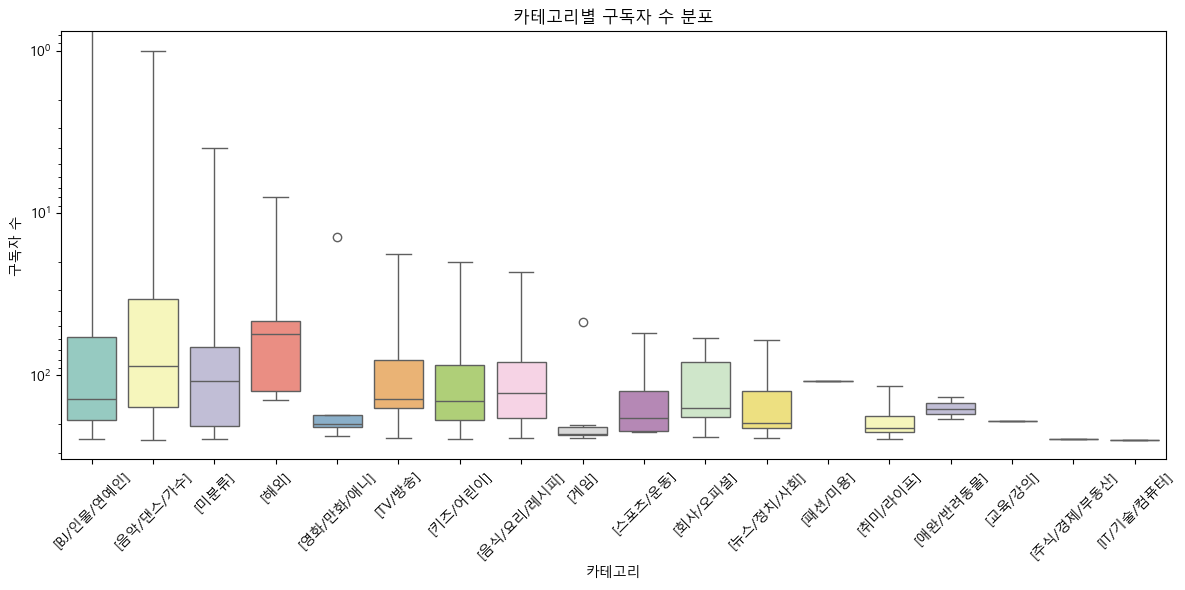

In [194]:
# 그림 크기 설정 (가로 12, 세로 6)
plt.figure(figsize=(12,6))

# 박스플롯 그리기
# x축: '카테고리', y축: '구독자 수'
# palette="Set3" : 색상을 예쁘게 설정
sns.boxplot(x='카테고리', y='구독자 수', data=info_df, palette="Set3")

# y축을 로그 스케일로 바꾸기
# 구독자 수 차이가 너무 크기 때문에 큰 값과 작은 값을 비교하기 쉽도록 조정
plt.yscale('log')  # 로그 스케일 적용

# x축 카테고리 이름 45도 기울이기
# 글자가 겹치지 않도록 하기 위해
plt.xticks(rotation=45)

# 그래프 제목 설정
plt.title("카테고리별 구독자 수 분포")

# y축 이름 설정
plt.ylabel("구독자 수")

# x축 이름 설정
plt.xlabel("카테고리")

# 레이아웃 자동 조정
# 글자나 그림이 잘리지 않도록 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()